<a href="https://colab.research.google.com/github/SDS-AAU/M2-2019/blob/master/notebooks/NLP_Quick_sentiment_analysis_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Most simple sentiment analysis

let's try to categorize our trump tweets by simply matching terms

![alt text](https://miro.medium.com/max/1400/1*T_wr7iiNs9_OR8V19w0qGw.png)

In [0]:
import pandas as pd

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [0]:
trump_tweets_df = pd.read_json('https://github.com/bpb27/trump_tweet_data_archive/raw/master/condensed_2018.json.zip')
trump_tweets_df = trump_tweets_df.set_index(pd.to_datetime(trump_tweets_df.created_at))

In [4]:
!wget https://gist.githubusercontent.com/mkulakowski2/4289437/raw/1bb4d7f9ee82150f339f09b5b1a0e6823d633958/positive-words.txt

--2019-10-10 19:48:21--  https://gist.githubusercontent.com/mkulakowski2/4289437/raw/1bb4d7f9ee82150f339f09b5b1a0e6823d633958/positive-words.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20630 (20K) [text/plain]
Saving to: ‘positive-words.txt’

positive-words.txt  100%[===================>]  20.15K  --.-KB/s    in 0.007s  

2019-10-10 19:48:21 (2.91 MB/s) - ‘positive-words.txt’ saved [20630/20630]



In [5]:
!wget https://gist.githubusercontent.com/mkulakowski2/4289441/raw/dad8b64b307cd6df8068a379079becbb3f91101a/negative-words.txt

--2019-10-10 19:48:23--  https://gist.githubusercontent.com/mkulakowski2/4289441/raw/dad8b64b307cd6df8068a379079becbb3f91101a/negative-words.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46300 (45K) [text/plain]
Saving to: ‘negative-words.txt’

negative-words.txt  100%[===================>]  45.21K  --.-KB/s    in 0.01s   

2019-10-10 19:48:23 (3.21 MB/s) - ‘negative-words.txt’ saved [46300/46300]



In [0]:
positive_words = open('positive-words.txt','r').read()[1540:].split('\n')
negative_words = open('negative-words.txt','r').read()[1541:].split('\n')

In [0]:
positive_count = trump_tweets_df['text'].map(lambda textline: len([word for word in tknzr.tokenize(textline) if word in positive_words]))
negative_count = trump_tweets_df['text'].map(lambda textline: len(['negative' for tag in tknzr.tokenize(textline) if tag in negative_words]))

In [8]:
trump_tweets_df.is_positive = positive_count > negative_count

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [9]:
trump_tweets_df[trump_tweets_df.is_positive == True]['text'][:10]

created_at
2018-12-31 20:02:52    Heads of countries are calling wanting to know...
2018-12-31 13:29:32    I campaigned on Border Security, which you can...
2018-12-31 12:51:22    An all concrete Wall was NEVER ABANDONED, as h...
2018-12-30 15:28:35    Veterans on President Trump’s handling of Bord...
2018-12-29 21:06:08    2018 is being called “THE YEAR OF THE WORKER” ...
2018-12-29 16:03:02    Just had a long and very good call with Presid...
2018-12-29 15:42:50    The Mueller Angry Democrats recently deleted a...
2018-12-28 14:51:07    Thank you to Sean Parnell for the nice comment...
2018-12-28 13:06:13    .....Honduras, Guatemala and El Salvador are d...
2018-12-27 22:10:07    This isn’t about the Wall, everybody knows tha...
Name: text, dtype: object

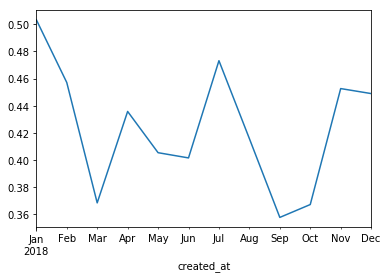

In [13]:
trump_tweets_df.is_positive.resample('M').mean().plot()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


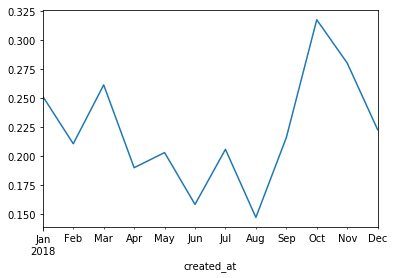

In [14]:

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

trump_tweets_df['sid_score'] = trump_tweets_df['text'].map(lambda text: sid.polarity_scores(text)['compound'])

trump_tweets_df.sid_score.resample('M').mean().plot()